In [63]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import yfinance as yf
import seaborn as sns

In [64]:
# Get the stock symbols / tickers in the portfolio
# Portföydeki hisse senedi sembollerini / işaretlerini alın
assest=["THYAO.IS","TUPRS.IS","DOAS.IS","TOASO.IS"]

In [65]:
# Assign weights to the stocks.
# Hisse senetlerine ağırlık atayın.
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Adjust weights accordingly / Ağırlıkları buna göre ayarlayın

In [66]:
# Get the stock / portfolio starting date
# Hisse senedi / portföy başlangıç ​​tarihini alın
stockStartDate="2013-01-01"

In [67]:
# Get the stocks ending date (today)
# Hisse senetlerinin bitiş tarihini alın (bugün)
today=datetime.today().strftime('%Y-%m-%d')
today

'2023-09-19'

In [68]:
# Store the adjusted close price of the stock into the df
# Hisse senedinin düzeltilmiş kapanış fiyatını df'de saklayın
df = yf.download(assest, start=stockStartDate, end=today)["Adj Close"]


[*********************100%***********************]  4 of 4 completed


In [69]:
df

,DOAS.IS,THYAO.IS,TOASO.IS,TUPRS.IS
Date,,,,
2013-01-01,3.199630,5.354156,4.932827,4.130636
2013-01-02,3.207089,5.439685,4.767612,4.150688
2013-01-03,3.207089,5.371261,4.932827,4.210843
2013-01-04,3.266755,5.405474,4.885623,4.190791
2013-01-07,3.311505,5.508109,4.932827,4.130636
...,...,...,...,...
2023-09-12,285.500000,236.000000,301.000000,142.399994
2023-09-13,273.700012,231.699997,296.000000,141.000000
2023-09-14,271.100006,238.500000,303.000000,144.500000


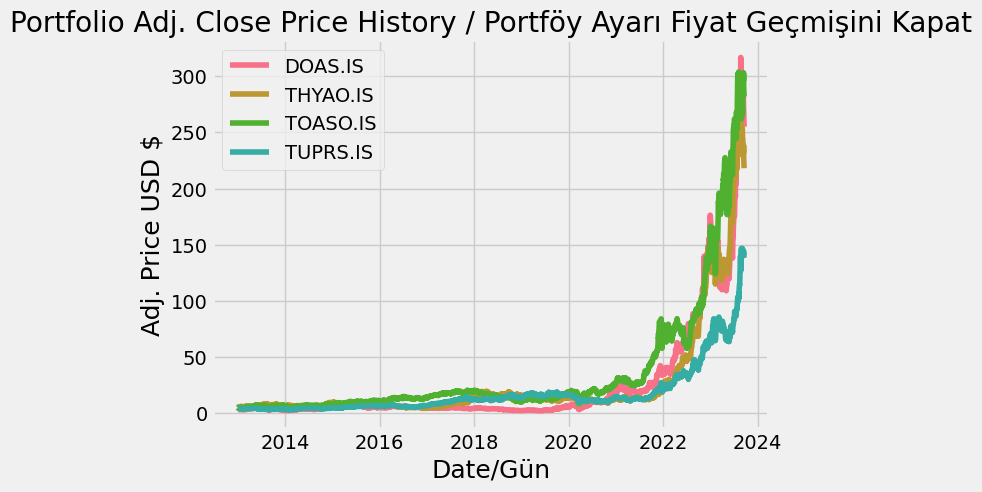

In [80]:
# Visually show the stock / portfolio
# Hisse senedini / portföyü görsel olarak gösterin
title="Portfolio Adj. Close Price History / Portföy Ayarı Fiyat Geçmişini Kapat"

# Get the stocks
# Hisse senetlerini al
my_stocks=df

# Create and plot the graph
# Grafiği oluşturun ve çizin
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)
        
plt.title(title)
plt.xlabel("Date/Gün",fontsize=18)
plt.ylabel("Adj. Price USD $",fontsize=18)
plt.legend(my_stocks.columns.values,loc="upper left")
plt.show()

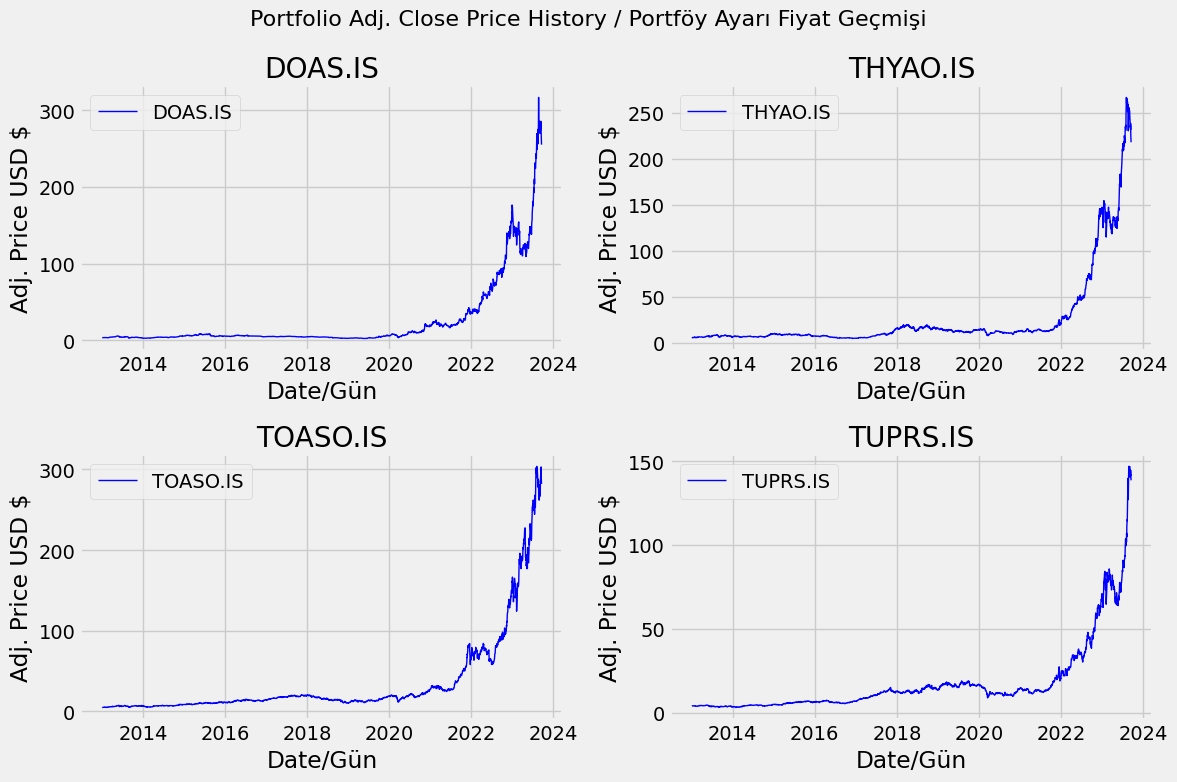

In [85]:
# Her hisse senedi için ayrı grafikler oluşturun
title = "Portfolio Adj. Close Price History / Portföy Ayarı Fiyat Geçmişi"

# Get the stocks
# Hisse senetlerini al
my_stocks = df

# Her bir hisse senedi için ayrı bir alt grafik oluşturun
plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlayın

for i, c in enumerate(my_stocks.columns.values):
    plt.subplot(2, 2, i + 1)  # 2x2 bir alt grafik düzeni
    plt.plot(my_stocks.index, my_stocks[c], label=c, linewidth=1.0, color='b')
    plt.title(c)
    plt.xlabel("Date/Gün")
    plt.ylabel("Adj. Price USD $")
    plt.legend(loc="upper left")

plt.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()


In [51]:
# Show the daily simple return
# Günlük basit getiriyi göster
returns=df.pct_change()
returns

,DOAS.IS,THYAO.IS,TOASO.IS,TUPRS.IS
Date,,,,
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,0.002331,0.015974,-0.033493,0.004854
2013-01-03,0.000000,-0.012579,0.034653,0.014493
2013-01-04,0.018604,0.006370,-0.009569,-0.004762
2013-01-07,0.013699,0.018987,0.009662,-0.014354
...,...,...,...,...
2023-09-12,0.038182,0.006397,0.025554,0.015692
2023-09-13,-0.041331,-0.018220,-0.016611,-0.009831
2023-09-14,-0.009499,0.029348,0.023649,0.024823


In [52]:
# Create and show the annualized covariance matrix
# Yıllıklandırılmış kovaryans matrisini oluşturun ve gösterin
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,DOAS.IS,THYAO.IS,TOASO.IS,TUPRS.IS
DOAS.IS,0.230867,0.079582,0.081184,0.053368
THYAO.IS,0.079582,0.165827,0.067873,0.066684
TOASO.IS,0.081184,0.067873,0.153743,0.056318
TUPRS.IS,0.053368,0.066684,0.056318,0.123681


In [53]:
cov_matrix_annual = returns[assest].cov() * 252

# Calculate the portfolio variance
# Portföy varyansını hesaplayın
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

In [54]:
port_variance

0.09275846788895831

In [55]:
# Calculate the portfolio volatility aka standard deviation
# Portföy volatilitesini yani standart sapmayı hesaplayın
port_volatility=np.sqrt(port_variance)
port_volatility

0.30456274868893324

In [56]:
# Calculate the annual portfolio return
# Yıllık portföy getirisini hesaplayın
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.44218955281593875

In [57]:
# Show the expected annual return, volatility (risk), and varience
# Beklenen yıllık getiriyi, volatiliteyi (riski) ve varyansı gösterin
percent_var=str(round(port_variance,2)*100)+"%"
percent_vols=str(round(port_volatility,2)*100)+"%"
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+"%"

print("Expected annual returns / Beklenen yıllık getiri: "+percent_ret)
print("Expected volatility / risky - Beklenen oynaklık / riskli: "+percent_vols)
print("Expected variance / Beklenen varyans: "+percent_var)

Expected annual returns / Beklenen yıllık getiri: 44.0%
Expected volatility / risky - Beklenen oynaklık / riskli: 30.0%
Expected variance / Beklenen varyans: 9.0%


In [58]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [59]:
# Portfolio Optimization
# Portföy Optimizasyonu


# Calculate the expected returns and the annualised sample covariance matrix of asset returns
# Varlık getirilerinin beklenen getirilerini ve yıllıklaştırılmış örnek kovaryans matrisini hesaplayın
mu= expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

# Optimize for max sharpe ratio
# Maksimum keskinlik oranı için optimize edin
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('DOAS.IS', 0.21378), ('THYAO.IS', 0.14721), ('TOASO.IS', 0.31616), ('TUPRS.IS', 0.32285)])
Expected annual return: 42.9%
Annual volatility: 30.0%
Sharpe Ratio: 1.36


(0.4291966846832929, 0.2998455323073542, 1.3646916181624116)

In [60]:
0.21378 + 0.14721 + 0.31616 + 0.32285

1.0

In [61]:
# Get the discrete allocation of each share per stock
# Hisse başına her hissenin ayrı ayrı tahsisini alın
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

latest_prices=get_latest_prices(df)
weight=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=15000)

allocation,leftover=da.lp_portfolio()
print("Discrete allocation/Ayrık tahsis:",allocation)
print("Funds remaining/Kalan fon: ${:.2f}".format(leftover))

Discrete allocation/Ayrık tahsis: {'THYAO.IS': 14, 'TOASO.IS': 20, 'TUPRS.IS': 42}
Funds remaining/Kalan fon: $489.60


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\problems\problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
